## Skoltech
## Intro to data science, fall 2023
## Assigment 2

### Goals
- Make exploratory data analysis
- Apply feature engineering and feature selection
- Try to solve classification task and use classification performance metrics
- Get the taste of gradient boosting approach

## Each student has personal set of questions

Google sheet with personal questions: https://docs.google.com/spreadsheets/d/1fQukrrzswoaoP633130mDMU0f4sOR4dY8Ai-AssnNDE/edit?usp=sharing

Every column corresponds to a single question, every row to a single student.

A lot of questions do not have individual tasks, so everybody need to complete them (if they are not in the table with individual tasks).

For example, Addisu Zena need to report questions **1.1, 1.2; 2; 3.2, 3.4, 3.5 etc.**

# Submiting the answers

Google form to submit your answers: https://forms.gle/EFhJ9ovtQUVdQRNY6

Use your **skoltech email**. For Name, Surname use **exactly the same spelling** as in canvas system.

---

If your answer is a ``float number``, then it must be provided with **3 decimals after the floating point**, e.g. 1.234

---

If your answer is a ``list of float or integer numbers or str``, then they should be reported in descending (alphabetical) order,  divided by a comma, e.g.:

10.453,9.112,5.001,5.000

---

The last part (Q20) as long as open questions (9, 18.3, 19) do not have corresponding fields in the google form. They are **not optional** and will be graded manually from your .ipynb file.

---

# Grading

For each correct answer from the google form you will get 1 point. The points for Q19 and Q20 are written near the questions.

**Note: the notebook should be linearly executable (restart and run all should work).**

If you have any questions regarding this Home Assignment, ask them in HW2 topic course telegram chat.

#### Import basic libraries

In [ ]:
!pip install ucimlrepo

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set();

from ucimlrepo import fetch_ucirepo

### Dataset
For the task we'll use Bank Marketing dataset. It contains marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y). A detailed description is available here: https://archive.ics.uci.edu/dataset/222/bank+marketing.
Let's take a brief look to the dataset.

In [ ]:
# fetch dataset
bank_marketing = fetch_ucirepo(id=222)

# data (as pandas dataframes)
df = bank_marketing.data.features
y = bank_marketing.data.targets

print(y)

# metadata
print(bank_marketing.metadata)

# variable information
print(bank_marketing.variables)

         y
0       no
1       no
2       no
3       no
4       no
...    ...
45206  yes
45207  yes
45208  yes
45209   no
45210   no

[45211 rows x 1 columns]
{'uci_id': 222, 'name': 'Bank Marketing', 'repository_url': 'https://archive.ics.uci.edu/dataset/222/bank+marketing', 'data_url': 'https://archive.ics.uci.edu/static/public/222/data.csv', 'abstract': 'The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 45211, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Occupation', 'Marital Status', 'Education Level'], 'target_col': ['y'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2014, 'last_updated': 'Fri Aug 18 2023', 'dataset_doi': '10.

In [ ]:
df.sample(5)

age         job   marital  education default  balance housing loan  \
25034   39  technician   married  secondary      no      484      no  yes   
38008   44  technician   married  secondary      no      736     yes   no   
42894   63   housemaid   married  secondary      no        2      no   no   
26542   30      admin.   married  secondary      no     1794      no   no   
36924   29    services  divorced  secondary      no      161     yes  yes   

         contact  day_of_week month  duration  campaign  pdays  previous  \
25034   cellular           18   nov        61         1    113         3   
38008  telephone           14   may       210         2     -1         0   
42894   cellular            4   feb        45         2     93         1   
26542   cellular           20   nov      1035         1     -1         0   
36924   cellular           12   may       286         5     -1         0   

      poutcome  
25034    other  
38008      NaN  
42894  success  
26542      NaN  
36924      NaN

In [ ]:
df.shape

(45211, 16)

# Section 1. Dataset acquaintance

-----
## Q1
#### 1.1 How many NaN values are there in the dataset?
#### 1.2 What is the highest number of NaN values in a single column?
#### 1.3 What is the name of the column with the smallest number (>0) of NaN values?

In [ ]:
print("1.1 How many NaN values are there in the dataset? - ", df.isnull().sum().sum())
print("1.2 What is the highest number of NaN values in a single column? - ", max(df.isnull().sum()))
print("1.3 What is the name of the column with the smallest number (>0) of NaN values? - ", \
      df[list(df.columns[(df.isnull().sum() > 0)])].isnull().sum().idxmin())

1.1 How many NaN values are there in the dataset? -  52124
1.2 What is the highest number of NaN values in a single column? -  36959
1.3 What is the name of the column with the smallest number (>0) of NaN values? -  job


In [ ]:
# TODO fill nans
# for categorical columns (if any) fill with 'unknown' value
object_columns = df.select_dtypes(include='object').columns
df_copy = df.copy()
df_copy.loc[:, object_columns] = df_copy.loc[:, object_columns].fillna("unknown")

# for numerical columns (if any) fill with column mean value
for i in list(df.select_dtypes(include='int64').columns):
    df[i].fillna(df[i].mean())

-----
## Q2
#### What is the fraction of '1' values in the dataset (fraction of accepted deposits, variable y)?

In [ ]:
df['y'] = np.where(y['y']=='yes', 1, 0)
print("What is the fraction of '1' values in the dataset (fraction of accepted deposits, variable y)? - ", \
      np.round((df["y"]==1).sum()/len(df["y"]), 3))

What is the fraction of '1' values in the dataset (fraction of accepted deposits, variable y)? -  0.117


-----
## Q3
For convenience, you can add target variale to the DataFrame (but do not forget to remove it from the dataframe after the data exploration).
#### In this question the most / least successful categories are measured in terms of average deposit acceptance rate.
#### 3.1 What is the most successful `poutcome` category?
#### 3.2 What is the most successful `contact` category?
#### 3.3 What is the least successful `marital` category?
#### 3.4 List top 3 most successful `job` categories in alphabetical order
#### 3.5 What is the most successful user profile (combination of marital status and job) - the answer should be in the form `marital,job` (eg. married,entrepreneur)
#### 3.6 Find the job with the smallest median balance. The answer is this job's median balance.

In [ ]:
print("3.1 What is the most successful poutcome category? - ", \
     *df.groupby("poutcome")["y"].count().sort_values(ascending=False).head(1).index)

print("3.2 What is the most successful contact category? - ", \
     *df.groupby("contact")["y"].count().sort_values(ascending=False).head(1).index)

print("3.3 What is the least successful marital category? - ", \
     *df.groupby("marital")["y"].count().sort_values(ascending=False).head(1).index)

print("3.4 List top 3 most successful job categories in alphabetical order - ", \
     *df.groupby("job")["y"].count().sort_values(ascending=False).head(3).index, sep=',')

print("3.5 What is the most successful user profile (combination of marital status and job) \
- the answer should be in the form marital,job (eg. married,entrepreneur) - ", \
     *df.groupby(['marital', 'job'])['y'].count().sort_values(ascending=False).head(1).index)

print("3.6 Find the job with the smallest median balance. The answer is this job's median balance????", \
     df.groupby(['job'])['balance'].median().min())

3.1 What is the most successful poutcome category? -  failure
3.2 What is the most successful contact category? -  cellular
3.3 What is the least successful marital category? -  married
3.4 List top 3 most successful job categories in alphabetical order - ,blue-collar,management,technician
3.5 What is the most successful user profile (combination of marital status and job) - the answer should be in the form marital,job (eg. married,entrepreneur) -  ('married', 'blue-collar')
3.6 Find the job with the smallest median balance. The answer is this job's median balance???? 339.5


----
## Q4
Map binary columns to 0 / 1 values (1 corresponds to yes). Do the same for the target variable y.
#### 4.1 Who accepts more deposits (on average): people with housing loans (`housing`) or people with personal loans (`loan`)? The answer is the acceptance rate of the chosen (most successful) category.
#### 4.2 What is the min, max, average and std values of age among people who have housing loans (`housing`)? The answer shold be given in descending order

In [ ]:
# TODO map y (target) values to 0 / 1
for i in ["housing", "loan", "default"]:
    df[i] = df[i].apply(lambda x: 0 if x == "yes" else 1)

In [ ]:
print("4.1 Who accepts more deposits (on average): people with housing loans (housing) \
or people with personal loans (loan)? The answer is the acceptance rate of the chosen \
(most successful) category? - ")
print(df.groupby(['housing', 'loan'])['y'].mean(), end='\n\n')

print("4.2 What is the min, max, average and std values of age among people who have \
      housing loans (housing)? The answer shold be given in descending order? - ", \
    np.round(df.groupby('housing')["age"].describe()[['max','min', 'mean', 'std']], 3).tail(1))


4.1 Who accepts more deposits (on average): people with housing loans (housing) or people with personal loans (loan)? The answer is the acceptance rate of the chosen (most successful) category? - 
housing  loan
0        0       0.060682
         1       0.080432
1        0       0.076121
         1       0.182225
Name: y, dtype: float64

4.2 What is the min, max, average and std values of age among people who have       housing loans (housing)? The answer shold be given in descending order? -            max   min   mean     std
housing                           
1        95.0  18.0  43.14  12.059


-----

## Q5
### Visualize the feature `age` for success and fail cases. What can you say about received distributions? (use bins=10 or 20). Type letter as your answer
- A. Distributions intersect significantly, hard to say for sure that the age matters.
- B. Distributions intersect significantly, the bigger the age, the bigger the success.
- C. Distributions intersect significantly, the less the age, the bigger the success.
- D. Distributions have almost no intersection, the less the age, the bigger the success.

<Axes: xlabel='age', ylabel='Probability'>

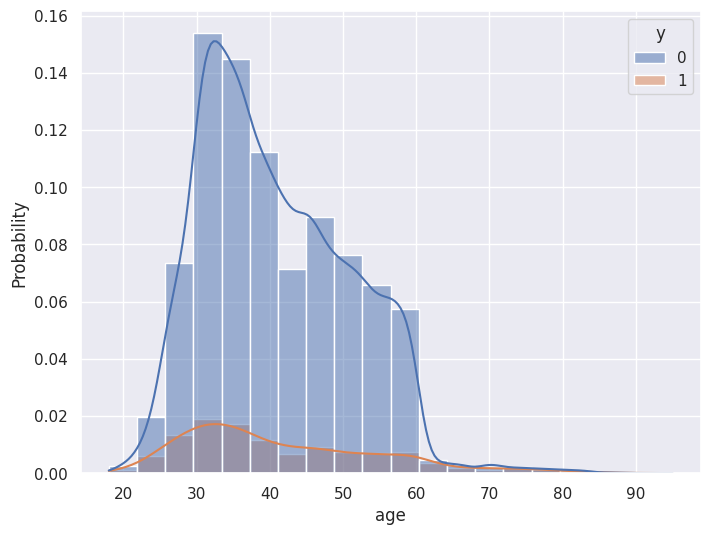

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='age', hue='y', stat="probability", kde=True, bins=20)

## Q6
### Visualize the feature `duration` for success and fail cases. What can you say about received distributions? (use bins=10 or 20). Type letter as your answer
- A. Distributions intersect significantly, hard to say for sure that the duration matters.
- B. Distributions intersect significantly, the bigger the duration, the bigger the success.
- C. Distributions intersect significantly, the less the duration, the bigger the success.
- D. Distributions have almost no intersection, the bigger the duration, the bigger the success.

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='duration', hue='y', stat="probability", kde=True, bins=20)
plt.xlim(0, 2000)

(0.0, 2000.0)

-----

## Q7
#### We need to define a list of numerical columns (not binary). How many numerical columns are there?

In [ ]:
# TODO define numerical columns
list_to_remove = ["default", "housing", "loan", "y"]
final_list = list(set(list(df.select_dtypes(include='int64').columns)) - set(list_to_remove))
print(*final_list, sep=',')
print(len(final_list))

pdays,previous,balance,duration,campaign,day_of_week,age
7


-----
## Q8

#### Compute Pearson correlation coefficient between the target variable and:
#### 8.1 `balance`
#### 8.2 `age`
#### 8.3 `duration`
#### 8.4 `pdays`
#### 8.5 What numerical feature has the highest Pearson correlation with the target variable?

In [ ]:
from scipy.stats.stats import pearsonr
print("Q.8.1 - 8.4")
stat = ["balance", "age", "duration", "pdays"]
print(*map(lambda x: np.round(pearsonr(df[x], df["y"])[0], 3), stat), sep=',', end='\n\n')


prsn_list = list(map(lambda x: np.round(abs(pearsonr(df[x], df["y"])[0]), 3), final_list))
print("What numerical feature has the highest Pearson correlation with the target variable? -", \
     final_list[prsn_list.index(max(prsn_list))])

Q.8.1 - 8.4
0.053,0.025,0.395,0.104

What numerical feature has the highest Pearson correlation with the target variable? - duration


<ipython-input-15-9b5fbfa608bd>:1: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


-----
## Q9
#### Visualize dependency of numerical data with success (target variable). Hint: look at seaborn `pairplot`. What do you think about it? Write your answer in the markdown cell in this notebook

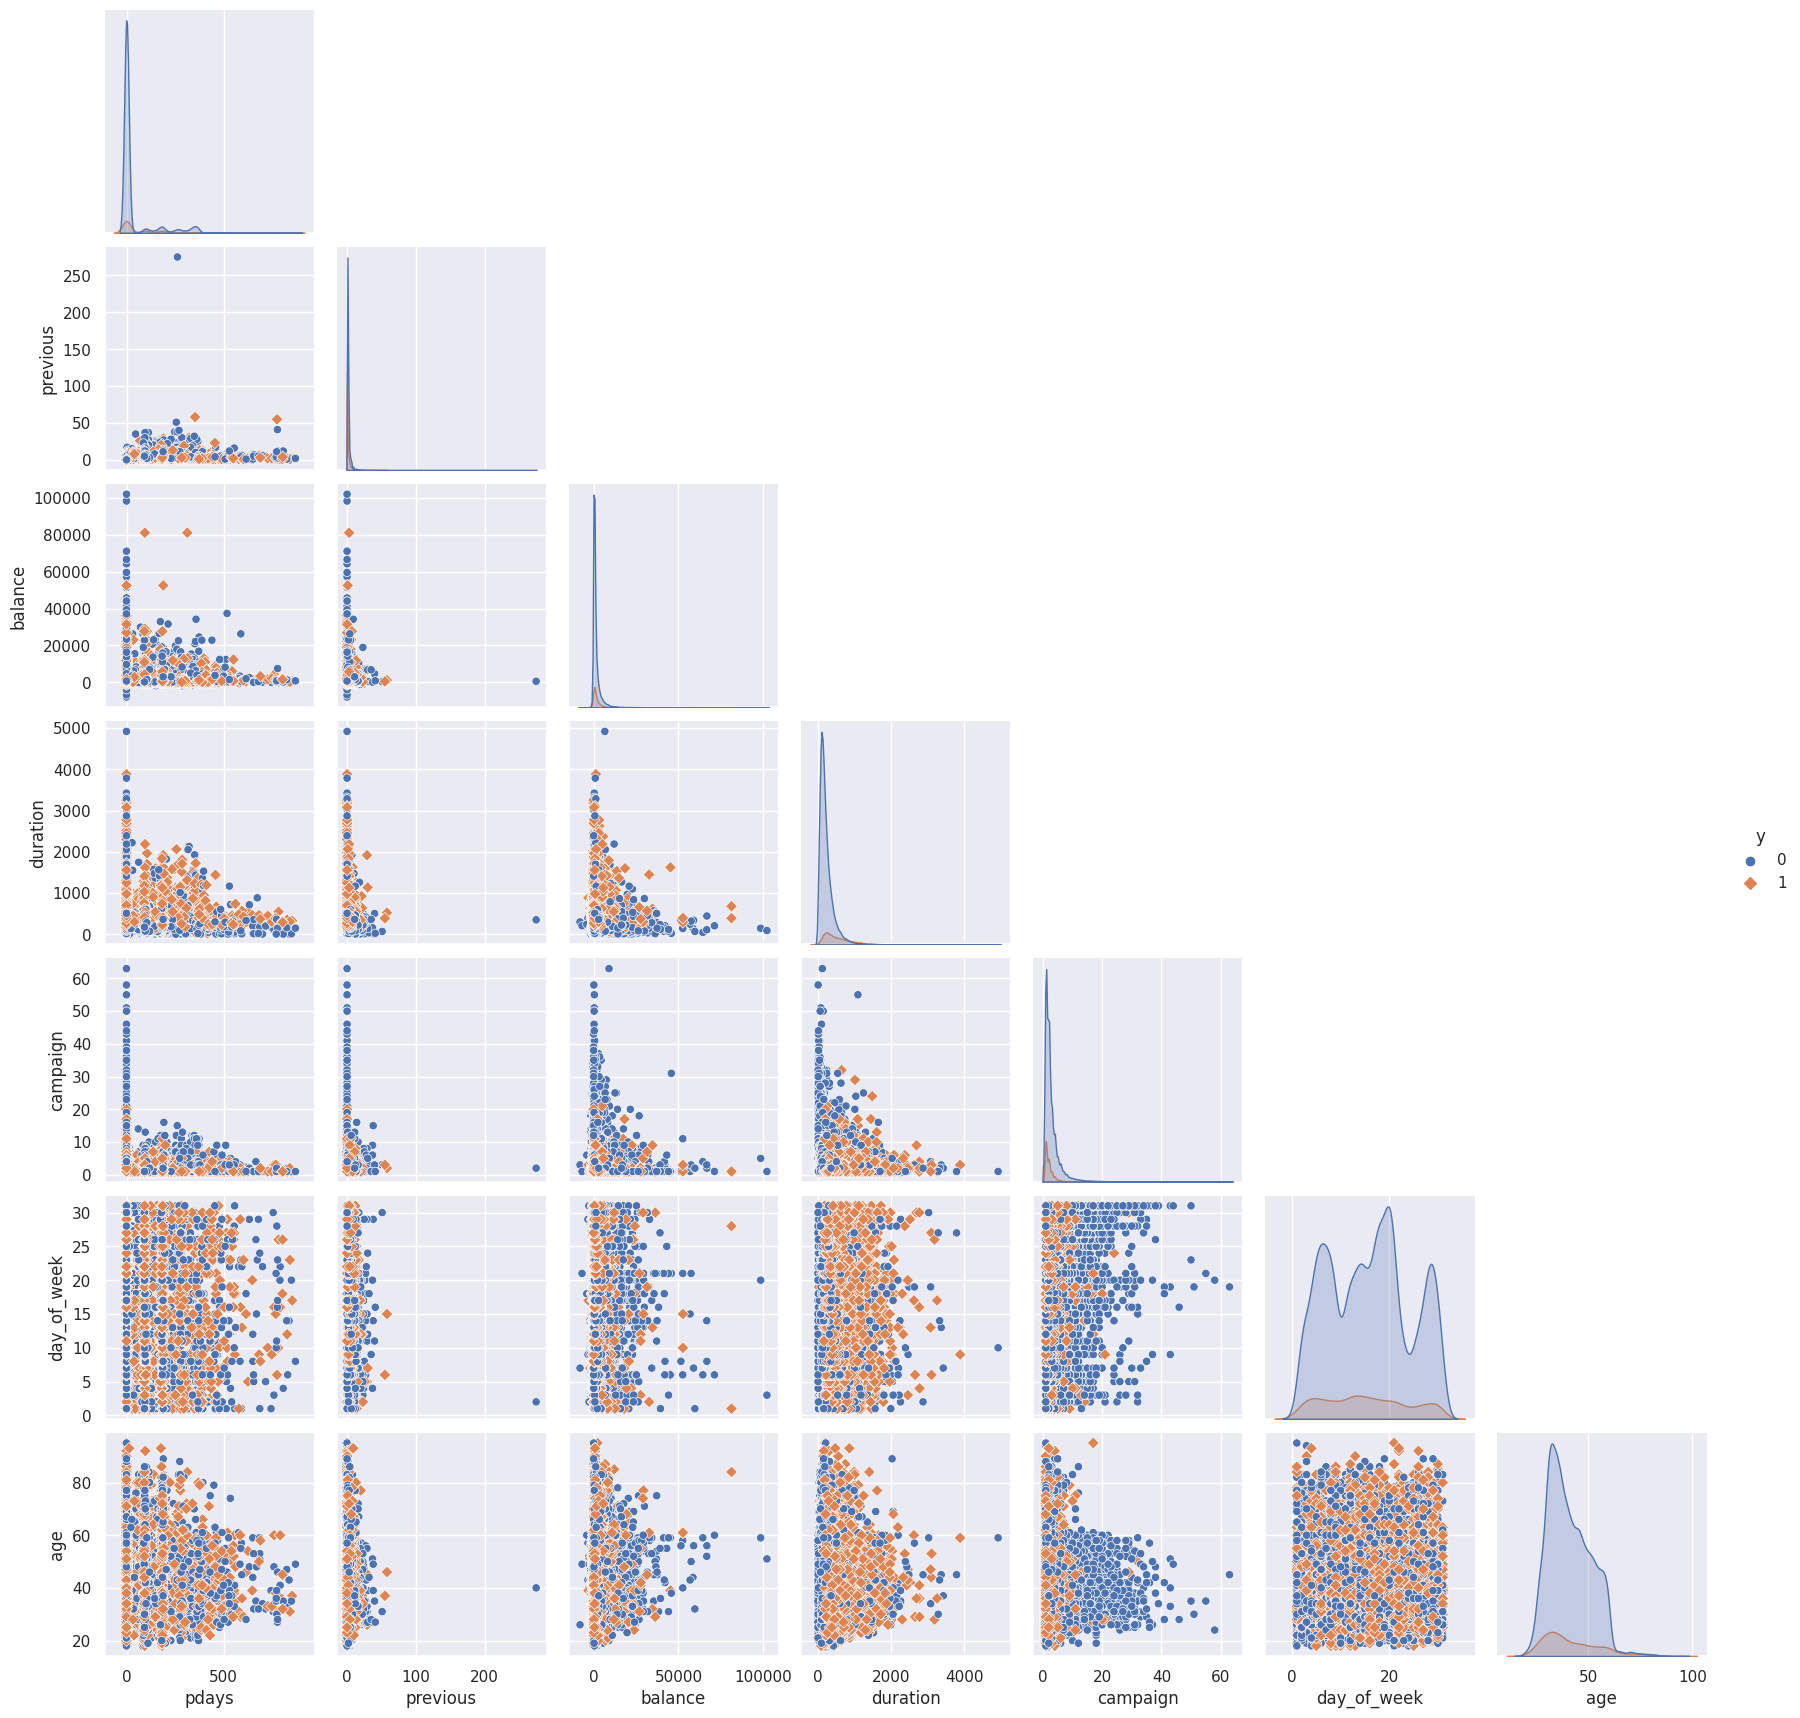

In [ ]:
sns.pairplot(data=df[final_list].join(df["y"]), hue="y", corner=True, markers=["o", "D"])

## Q10 Feature generation
Lets' generate some more features that could be useful.

#### Create a binary column that would hold the info if the person was contacted before (use column `pdays`). How many people were not contacted earlier?

In [ ]:
df["was_contacted_before"] = df["pdays"].apply(lambda x: 0 if x == -1 else 1)

In [ ]:
print("How many people were not contacted earlier? - ", df[(df["was_contacted_before"]==0)].shape[0])

How many people were not contacted earlier? -  36954


------
-----
# Preprocessing

## Q11
Drop the leaking column with target variable from your dataframe (if you have added it earlier).

#### How many columns do you have now?

In [ ]:
target = df["y"]
df.drop("y", axis=1, inplace=True)

In [ ]:
print("How many columns do you have now? - ", df.shape[1])

How many columns do you have now? -  17


-----
## Q12
Add one-hot labels for categorical columns. For a column with $k$ categories you should keep $k - 1$ one-hot columns.

Drop the initial categorical columns from the DataFrame.

#### How many resulting columns in a DataFrame do you have after this operation?

In [ ]:
categorical_clmn = df.select_dtypes(include='object').columns

In [ ]:
# TODO add one-hot labels and drop columns
ohl_df = pd.get_dummies(df, columns=categorical_clmn, drop_first=True)

# Increase maximal displayed columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [ ]:
print("How many resulting columns in a DataFrame do you have after this operation? - ", ohl_df.shape[1])

How many resulting columns in a DataFrame do you have after this operation? -  39


## Q13
Split the dataset without stratification and with random state 42 and test size 0.2.
#### How many of successful deposit subsciptions are in train set?

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV

X, Y = ohl_df, target
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print("How many of successful deposit subsciptions are in train set? - ", list(Y_test).count(1))

How many of successful deposit subsciptions are in train set? -  1091


## Q14 Feature selection
Scale the numeric columns with standard scaler
#### What is median value in `duration` field after scaling?

In [ ]:
# remove categories and  from normalization!
job = ohl_df.filter(regex='job_').columns.tolist()
marital = ohl_df.filter(regex='marital_').columns.tolist()
education = ohl_df.filter(regex='education_').columns.tolist()
contact = ohl_df.filter(regex='contact_').columns.tolist()
month = ohl_df.filter(regex='month_').columns.tolist()
poutcome = ohl_df.filter(regex='poutcome_').columns.tolist()

clmn_binary = ["default", "housing", "loan", "was_conducted_before"]
list_to_remove = job+marital+education+contact+month+poutcome + clmn_binary

In [ ]:
# Normalization of data
from sklearn.preprocessing import StandardScaler

features =list(set(list(ohl_df.columns)) - set(list_to_remove))

scaler = StandardScaler()
X_train[features] = scaler.fit_transform(X_train[list(features)])
X_test[features] = scaler.fit_transform(X_test[list(features)])

In [ ]:
print(
    "What is median value in duration field after scaling? - ", \
      np.round(max(X_train["duration"].tolist() + X_test["duration"].tolist()), 3)
     )

What is median value in duration field after scaling? -  18.145


## Q15 Estimate feature importance by Anova
#### What are the three most important features by anova with f classifier?

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

anova = SelectKBest(score_func=f_classif, k=3)
anova.fit(X_train, Y_train)
print("What are the three most important features by anova with f classifier? - ",\
      (anova.get_feature_names_out()))

What are the three most important features by anova with f classifier? -  ['duration' 'was_contacted_before' 'poutcome_success']


## Q16 Logistic regression
Build a model with logistic regression.
Use l2 penalty and search for optimal C in `np.logspace(-2, 4, 7)`, set `max_iter = 400`.

#### Q16.1 What is an optimal C for l2 regularization?
#### Q16.2 What is the accuracy for this params?
#### Q16.3 What is the three most important features by logistic regression estimation?
#### Q16.4 Build roc curve and calculate roc-auc score. What is the roc-auc score?

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [ ]:
params_grid_log_reg = {
    "C": np.logspace(-2, 4, 7),
              }

CV_log_reg = GridSearchCV(LogisticRegression(penalty="l2", max_iter=400),
                      params_grid_log_reg,
                          cv=5)

In [ ]:
CV_log_reg.fit(X_train, Y_train)
CV_log_reg.predict(X_test)
print(CV_log_reg.best_estimator_, CV_log_reg.best_score_)
print("Q16.1 What is an optimal C for l2 regularization? - ",\
     CV_log_reg.best_params_["C"])

LogisticRegression(C=10.0, max_iter=400) 0.901598225746348
Q16.1 What is an optimal C for l2 regularization? -  10.0


In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

best_log_reg = CV_log_reg.best_estimator_
best_log_reg.fit(X_train, Y_train)
Y_predict_log_reg = best_log_reg.predict(X_test)

print("Q16.2 What is the accuracy for this params? -",\
      (accuracy_score(Y_test, best_log_reg.predict(X_test))), end="\n\n")


Y_predict_proba = best_log_reg.predict_proba(X_test)[:, 1]

plt.figure(figsize=(8, 6))

fpr, tpr, _ = roc_curve(Y_test, Y_predict_proba)

sns.lineplot(x=fpr, y=tpr)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC curve Logistic")
plt.show()

print("Q16.4 What is the roc-auc score? -",\
      (roc_auc_score(Y_test, Y_predict_proba)), end="\n\n")

Q16.2 What is the accuracy for this params? - 0.8978215194072764



Q16.4 What is the roc-auc score? - 0.9008962113653507



In [ ]:
weights = list(map(lambda x: abs(x).round(3), best_log_reg.coef_[0]))
df_best_features = pd.DataFrame({"features":list(ohl_df.columns)}).join(pd.DataFrame({"weights":weights}))
df_best_features = df_best_features.sort_values(by=['weights'], ascending=False)
print('Q16.3 What is the three most important features by logistic regression estimation?: {}'\
      .format(sorted(df_best_features.features[:3].tolist())))

Q16.3 What is the three most important features by logistic regression estimation?: ['month_jan', 'month_mar', 'poutcome_success']


------

## Q17 Random forest
Build a random forest model.
Use random state 42, maximum depth from 2 to 15, and number of estimators in `[10, 20, 50, 100, 200]`
#### Q17.1 What is an optimal depth and number of trees?
#### Q17.2 What is the roc-auc for this params?
#### Q17.3 Build precision-recall curve. What is the highest precision for recall >0.5?
#### Q17.4 Build precision-recall curve. What is the highest recall for precision >0.5?
#### Q17.5 Build precision-recall curve. What is the precision for binarization threshold=0.3?
#### Q17.6 Build precision-recall curve. What is the recall for binarization threshold=0.3?
#### Q17.7 What is the three most important features by random forest?

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
params_rndm_tree = {"n_estimators":[i for i in [10, 20, 50, 100, 200]],
                    "max_depth":[i for i in range(2, 15)],
                    "random_state":[42]
              }

CV_rndm_tree = GridSearchCV(RandomForestClassifier(),
                      params_rndm_tree,
                      n_jobs=-1,
                      cv=5)

In [ ]:
CV_rndm_tree.fit(X_train, Y_train)
CV_rndm_tree.predict(X_test)
print(CV_rndm_tree.best_estimator_, CV_rndm_tree.best_score_)
print("Q17.1 What is an optimal depth and number of trees? - ",\
     CV_rndm_tree.best_estimator_)

RandomForestClassifier(max_depth=14, n_estimators=50, random_state=42) 0.9050819132549984
Q17.1 What is an optimal depth and number of trees? -  RandomForestClassifier(max_depth=14, n_estimators=50, random_state=42)


In [ ]:
best_rndm_tree = CV_rndm_tree.best_estimator_
best_rndm_tree.fit(X_train, Y_train)
Y_predict_rndm_tree = best_rndm_tree.predict(X_test)

Y_predict_proba_rndm_tree = best_rndm_tree.predict_proba(X_test)[:, 1]

print("Q17.2 What is the roc-auc for this params? -",\
      (roc_auc_score(Y_test, Y_predict_proba_rndm_tree)), end="\n\n")

Q17.2 What is the roc-auc for this params? - 0.9172797440002064



Q17.3 What is the highest precision for recall >0.5?  0.6134831460674157
Q17.4 Build precision-recall curve. What is the highest recall for precision >0.5?  0.7653528872593951
Q17.5 Build precision-recall curve. What is the precision for binarization threshold=0.3?  0.5582677165354331
Q17.6 Build precision-recall curve. What is the recall for binarization threshold=0.3?  0.6498625114573785


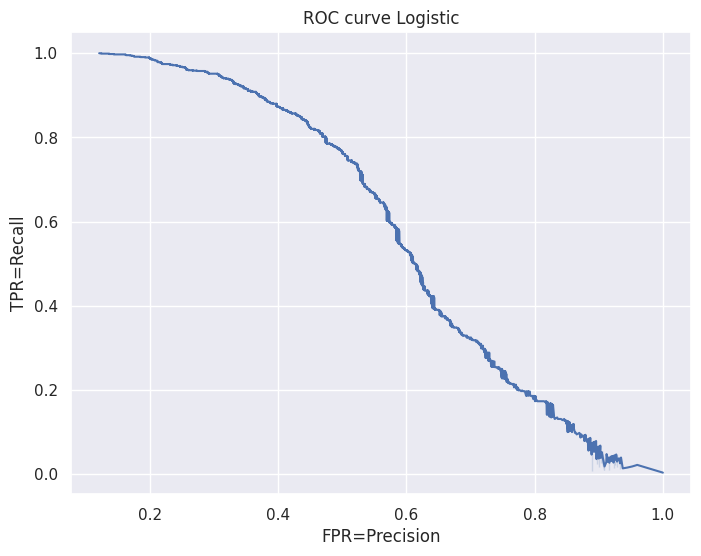

In [ ]:
from sklearn.metrics import precision_recall_curve

fpr_rndm, tpr_rndm, thresholds = precision_recall_curve(Y_test, Y_predict_proba_rndm_tree)

print("Q17.3 What is the highest precision for recall >0.5? ", max(fpr_rndm[tpr_rndm > 0.5]))
print("Q17.4 Build precision-recall curve. What is the highest recall for precision >0.5? ", \
      max(tpr_rndm[fpr_rndm > 0.5]))

threshold_index = next(i for i, threshold in enumerate(thresholds) if threshold >= 0.3)
print("Q17.5 Build precision-recall curve. What is the precision for binarization threshold=0.3? ", \
     fpr_rndm[threshold_index])

threshold_index = next(i for i, threshold in enumerate(thresholds) if threshold >= 0.3)
print("Q17.6 Build precision-recall curve. What is the recall for binarization threshold=0.3? ", \
     tpr_rndm[threshold_index])

plt.figure(figsize=(8, 6))

sns.lineplot(x=fpr_rndm, y=tpr_rndm)
plt.xlabel("FPR=Precision")
plt.ylabel("TPR=Recall")
plt.title("ROC curve Logistic")
plt.show()

In [ ]:
weights = list(best_rndm_tree.feature_importances_)
df_best_features_rdmn = pd.DataFrame({"features":list(ohl_df.columns)}).join(pd.DataFrame({"weights":weights}))
df_best_features_rdmn = df_best_features_rdmn.sort_values(by=['weights'], ascending=False)
print('Q17.7 What is the three most important features by random forest?: {}'\
      .format(sorted(df_best_features_rdmn.features[:3].tolist())))

Q17.7 What is the three most important features by random forest?: ['age', 'duration', 'poutcome_success']


-----

## Q18 Feature selection
Select **top-30** features (by random forest model). Train random forest again with the same parameters of grid search.
#### 18.1 What is the roc-auc score for this model?
#### 18.2 What is the f1 score for this model?
#### 18.3 Does the classification quality improve after feature selection? What do you think? Please, answer here

In [ ]:
weights = list(best_rndm_tree.feature_importances_)
df_best_features_rdmn = pd.DataFrame({"features":list(ohl_df.columns)}).join(pd.DataFrame({"weights":weights}))
df_best_features_rdmn_features = df_best_features_rdmn.features[:30].tolist()

In [ ]:
X_30, Y_30 = ohl_df[df_best_features_rdmn_features], target
X_train_30, X_test_30, Y_train_30, Y_test_30 = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
params_rndm_tree_30 = {"n_estimators":[i for i in [10, 20, 50, 100, 200]],
                    "max_depth":[i for i in range(2, 15)],
                    "random_state":[42]
              }

CV_rndm_tree_30 = GridSearchCV(RandomForestClassifier(),
                      params_rndm_tree_30,
                      n_jobs=-1,
                      cv=5)

In [ ]:
CV_rndm_tree_30.fit(X_train_30, Y_train_30)
CV_rndm_tree_30.predict(X_test_30)
print(CV_rndm_tree_30.best_estimator_, CV_rndm_tree_30.best_score_)
print("What is an optimal depth and number of trees? - ",\
     CV_rndm_tree_30.best_estimator_)

RandomForestClassifier(max_depth=14, random_state=42) 0.9047777823518837
What is an optimal depth and number of trees? -  RandomForestClassifier(max_depth=14, random_state=42)


In [ ]:
best_rndm_tree_30 = CV_rndm_tree_30.best_estimator_
best_rndm_tree_30.fit(X_train_30, Y_train_30)
Y_predict_rndm_tree_30 = best_rndm_tree_30.predict(X_test_30)

Y_predict_proba_rndm_tree_30 = best_rndm_tree.predict_proba(X_test_30)[:, 1]

print("Q18.1 What is the roc-auc for this model? -",\
      (roc_auc_score(Y_test_30, Y_predict_proba_rndm_tree_30)))

from sklearn.metrics import f1_score

print("Q18.2 What is the f1 score for this model?-",\
      (f1_score(Y_test_30, Y_predict_rndm_tree_30)), end="\n\n")

weights_30 = list(best_rndm_tree_30.feature_importances_)
df_best_features_rdmn_30 = pd.DataFrame({"features":list(ohl_df[df_best_features_rdmn_features].columns)}).join(pd.DataFrame({"weights":weights}))
df_best_features_rdmn_30 = df_best_features_rdmn.sort_values(by=['weights'], ascending=False)
print('Q18. What is the three most important features by random forest_30?: {}'\
      .format(sorted(df_best_features_rdmn_30.features[:3].tolist())))

Q18.1 What is the roc-auc for this model? - 0.5993630204692868
Q18.2 What is the f1 score for this model?- 0.46389228886168915

Q18. What is the three most important features by random forest_30?: ['age', 'duration', 'poutcome_success']


In [ ]:
print("18.3 Does the classification quality improve after feature selection? \
What do you think? Please, answer here", "NO")

print("roc-auc for this random forest ? -",\
      (roc_auc_score(Y_test, Y_predict_proba_rndm_tree)))
print("roc-auc for this random forest 30? -",\
      (roc_auc_score(Y_test_30, Y_predict_proba_rndm_tree_30)))

18.3 Does the classification quality improve after feature selection? What do you think? Please, answer here NO
roc-auc for this random forest ? - 0.9172797440002064
roc-auc for this random forest 30? - 0.5993630204692868


------
## Q19 (2 points) Analysis
Analyze the resulting top-3 features of three previously considered methods. Are they consistent with each other. Are there any strange features among top features of any feature selection algorithm? Please, write your thoughts here.

----

In [ ]:
print('Logistic regression estimation: {}'\
      .format(sorted(df_best_features.features[:3].tolist())))

print('Random forest: {}'\
      .format(sorted(df_best_features_rdmn.features[:3].tolist())))

print('Random forest_30: {}'\
      .format(sorted(df_best_features_rdmn_30.features[:3].tolist())))

Logistic regression estimation: ['month_jan', 'month_mar', 'poutcome_success']
Random forest: ['age', 'balance', 'default']
Random forest_30: ['age', 'duration', 'poutcome_success']


Logistic regression differ from both random forest model. Moreover, it has 3 features that are not decisive for solving this problem, unlike the signs obtained by both random forest models. Therefore, logistic regrasstion model is not applicable to solve these problem.

## Q20 Build the stronger model

#### 20.1 (3 points) Generate two (or more) meaningfull features.
Feel free to change the preprocessing, if you need it (eg. explicitly use categorical features for CatBoost).

Also, feel free to select features, etc. The pipeline is up to you.
#### (3 points) Train a gradient boosting, that beats random forest using:
#### 20.2 `XGBoost`
#### 20.3 `CatBoost`

In [ ]:
#Q20.1

In [ ]:
feature1 = ohl_df.groupby('age')['duration'].mean()
ohl_df["contact_duration"] = df["age"].map(feature1)

feature2 = ohl_df.groupby('age')['poutcome_success'].mean()
ohl_df["poutcome_success_by_age"] = df["age"].map(feature2)

In [ ]:
X, Y = ohl_df, target
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

params_rndm_tree_mine = {"n_estimators":[i for i in [10, 20, 50, 100, 200]],
                    "max_depth":[i for i in range(2, 15)],
                    "random_state":[42]
              }

CV_rndm_tree_mine = GridSearchCV(
    RandomForestClassifier(),
    params_rndm_tree_mine,
    n_jobs=-1,
    cv=5
)

In [ ]:
CV_rndm_tree_mine.fit(X_train, Y_train)
CV_rndm_tree_mine.predict(X_test)

print(CV_rndm_tree_mine.best_estimator_, CV_rndm_tree_mine.best_score_)
print("Optimal depth and number of trees: ", CV_rndm_tree_mine.best_estimator_)


best_rndm_tree_mine = CV_rndm_tree_mine.best_estimator_

# Make predictions and calculate ROC-AUC score
Y_predict_rndm_tree_mine = best_rndm_tree_mine.predict(X_test)
Y_predict_proba_rndm_tree_mine = best_rndm_tree_mine.predict_proba(X_test)[:, 1]

# Calculate ROC-AUC score
roc_auc = roc_auc_score(Y_test, Y_predict_proba_rndm_tree_mine)

print("ROC-AUC: ", roc_auc)

RandomForestClassifier(max_depth=14, n_estimators=50, random_state=42) 0.9028344961394138
Optimal depth and number of trees:  RandomForestClassifier(max_depth=14, n_estimators=50, random_state=42)
ROC-AUC:  0.9136630758362713


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_predict_rndm_tree_mine, Y_test))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95     12764
           1       0.33      0.66      0.44       800

    accuracy                           0.90     13564
   macro avg       0.65      0.79      0.69     13564
weighted avg       0.94      0.90      0.92     13564



In [ ]:
weights = list(best_rndm_tree_mine.feature_importances_)
df_best_features_rdmn = pd.DataFrame({"features":list(ohl_df.columns)}).join(pd.DataFrame({"weights":weights}))
df_best_features_rdmn = df_best_features_rdmn.sort_values(by=['weights'], ascending=False)
print('Three most important features by random forest: {}'\
      .format(sorted(df_best_features_rdmn.features[:3].tolist())))

Three most important features by random forest: ['balance', 'duration', 'poutcome_success']


In [ ]:
#20.2 XGBoost

In [ ]:
import xgboost as xgb

In [ ]:
train, test = xgb.DMatrix(X_train, label=Y_train), xgb.DMatrix(X_test, label=Y_test)

param_xgb = {
    'gamma': 0.2,
    'max_depth': 6,
    'eta': 0.5,
    'objective': 'binary:logistic',
    'eval_metric': 'logloss'
}

xgb_model = xgb.train(param_xgb, train)
Y_prediction = xgb_model.predict(test)


print("ROC-AUC xgboost", roc_auc_score(Y_test, Y_prediction))
print("f1 xgboost", f1_score(Y_test, Y_prediction.round()))

ROC-AUC xgboost 0.9181842556831339
f1 xgboost 0.510158013544018
